In [1]:
import numpy as np
import editdistance as ed

from collections import Counter, OrderedDict

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt

In [2]:
def find_closest(d, init_item, t):
    min_ed = t
    answ_item = [-1, -1]
    for comp_item in d.items():
        dist = ed.eval(init_item, comp_item[0])
        if dist < min_ed:
            min_ed = dist
            answ_item = comp_item

    return min_ed, answ_item

In [3]:
def squash(od, t, verbose =False):
    answ = OrderedDict()
    sp_to_n = {}
    index = 0
    
    for init_item in tqdm_notebook(od.items()):
        #ord_dict.pop(init_item[0])

        if len(answ) == 0 :
            print("new spacer:", init_item[0], init_item[1])
            answ[init_item[0]] = init_item[1]
            sp_to_n[init_item[0]] = index
            index += 1
        else:
            min_ed, answ_item = find_closest(answ, init_item[0], t)
            if min_ed < t:
                answ[answ_item[0]] += init_item[1]
                sp_to_n[init_item[0]] = sp_to_n[answ_item[0]]
                if verbose: print("add:", init_item[0], "to", answ_item[0], answ[answ_item[0]])
            else:
                sp_to_n[init_item[0]] = index
                index += 1
                answ[init_item[0]] = init_item[1]
                if verbose: print("new spacer:", init_item[0], init_item[1])
    return answ, sp_to_n

            

In [4]:
with open("../data/CRISPR_db_2109.txt") as f:
    arrays = f.readlines()

In [5]:
arrays = [x.split()[1:] for x in arrays]

In [6]:
arrays[:1]

[['AACATCGGAAACGGCTTCGCGGCGGCGGAT',
  'TACGTGAAGAATATTTGCAACACCCGCAAGAA',
  'AACATCGGAAACGGCTTCGCGGCGGCGGCGTC',
  'TACGTGAAGAATATTTGCAACACCCGCAAGAA',
  'GGCATAGCCAGGCTGATCCGGCGACGGCCTTA',
  'GCCCGCCTCGTCGGTGTATTCCGCGAGATCGC',
  'AACGCATAGACGGGAAAAGTCTGCTCGATTGG',
  'GGATTGTGGCATCAGGTGATATCGCCAAAAC',
  'ACTGTCATCTCTCTCCCACTGGGAGATAGAAA',
  'GAAACTCTCTGAGAATCCGTCAGCAAAAATAC',
  'CCCTTGAATGCGTTCAAAAGGTTATCGACACA',
  'TTTAACAGCCTGGCTACTCAGGCTGGTGTCAG',
  'TCGGTGCAAACGAAAACCGGAACGTATCAGAA',
  'AGCTCCCCGATGTGGCAGTTAAACGCAGTAAT',
  'TCTGGTGCCGCCAAATCATTTCAGGAACTCGG',
  'GCTTCGGTGCATTCATCTATTTATCTAAATCC']]

In [7]:
lines = [x for y in arrays for x in y]

In [8]:
counter = Counter(lines)
ord_dict = OrderedDict()

u_lines = []
counts = []
for item in counter.items():
    u_lines.append(item[0])
    counts.append(item[1])
    
u_lines = np.array(u_lines)
counts = np.array(counts)

args_s = np.argsort(counts)[::-1]

for l, c in zip(u_lines[args_s], counts[args_s]):
    ord_dict[l] = c


In [9]:
sp_to_n = {}

nd, sp_to_n = squash(ord_dict, 3)

cl_to_n = {}
n_to_clust = {}
for i, it in enumerate(nd.items()):
    cl_to_n[it[0]] = i
    n_to_clust[i] = it[0]

A Jupyter Widget

new spacer: AAAACCAAACTTCTCCATAAATTCCATAGCCG 673



In [10]:
as_clusters =  [[sp_to_n[find_closest(sp_to_n, x, 3)[1][0]] for x in arr] for arr in arrays]

In [16]:
import pickle

In [17]:
pickle.dump(as_clusters, open("../data/db_as_clusters", 'wb'))

In [50]:
gr = np.zeros((len(sp_to_n), len(sp_to_n)))

for arr in as_clusters:
    for x, y in zip(arr, arr[1:]):
        gr[x, y] += 1

In [51]:
def plot_gr(gr, start=0, end=-1, log = False, all_ticks = False,  s=10):
    plt.figure(figsize=(s,s))
    if end == -1:
        end = gr.shape[0]
    if log:
        plt.imshow(np.log(gr[start:end,start:end] + 1))
    else:
        plt.imshow(gr[start:end,start:end])
    plt.colorbar()
    if all_ticks: 
        plt.xticks(np.arange(start,end))
        plt.yticks(np.arange(start,end))
    plt.show()

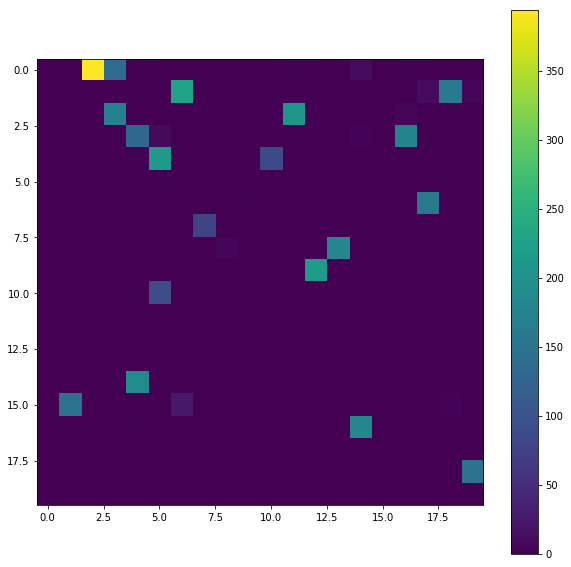

In [56]:
plot_gr(gr[:20, :20], s = 10)

In [57]:
import networkx as nx

In [84]:
dgr = nx.DiGraph()

In [90]:
for arr in as_clusters[:10]:
    for x, y in zip(arr, arr[1:]):
        dgr.add_edge(x, y)

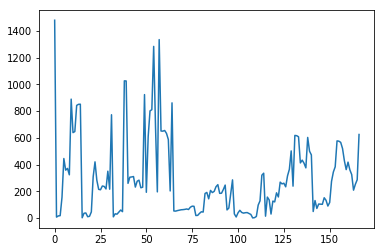

In [91]:
plt.plot(dgr)

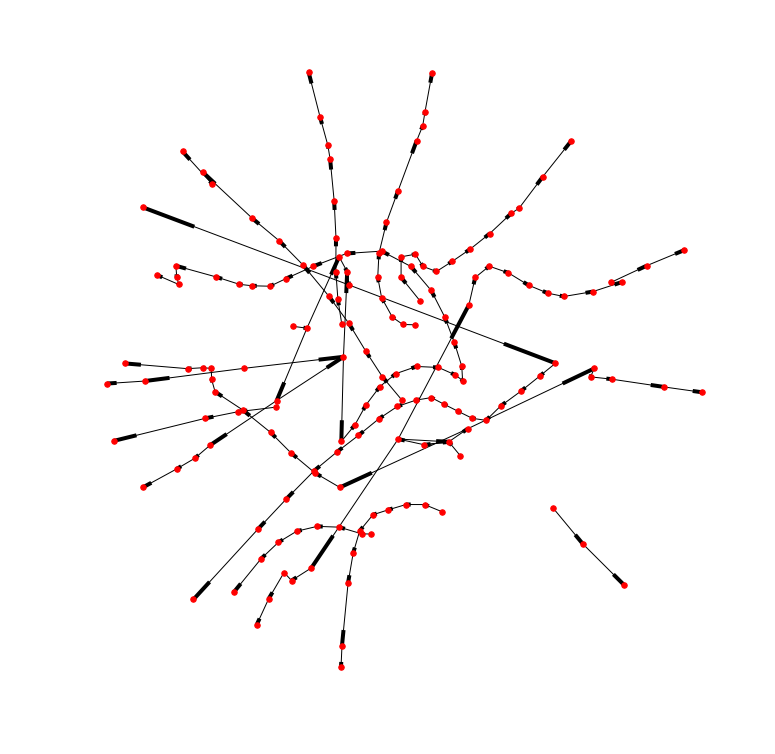

In [92]:
plt.figure(figsize=(10,10))
nx.draw(dgr, node_size=30,  )